In [1]:
import pandas as pd

customer_behavior = pd.read_csv('customer_behavior.csv')
customer_behavior

,session_count,avg_session_duration,pages_visited,total_spent,purchase_frequency,product_variety,return_rate,discount_usage,support_interactions,days_since_last_visit
0,23,5.177320,6.812728,169.605402,0,4,0.254682,25.505569,1,71
1,15,7.711826,9.651593,43.096426,4,3,0.070044,12.326525,0,51
2,21,7.692573,4.425673,69.103336,2,6,0.159048,8.753443,1,39
3,25,7.180291,4.205764,193.654437,3,2,0.046724,15.043512,2,28
4,15,12.488425,5.832801,156.666087,2,4,0.181730,27.168795,0,26
...,...,...,...,...,...,...,...,...,...,...
1020,2,67.241758,43.762529,4652.353630,9,24,0.750444,82.850945,13,294
1021,2,87.537480,35.842142,3784.391747,8,41,0.651045,96.570480,18,274
1022,2,58.326953,32.063522,4211.923165,9,33,0.906352,61.174652,10,367
1023,2,89.004955,20.883275,2400.843412,8,30,0.971165,92.065471,12,399


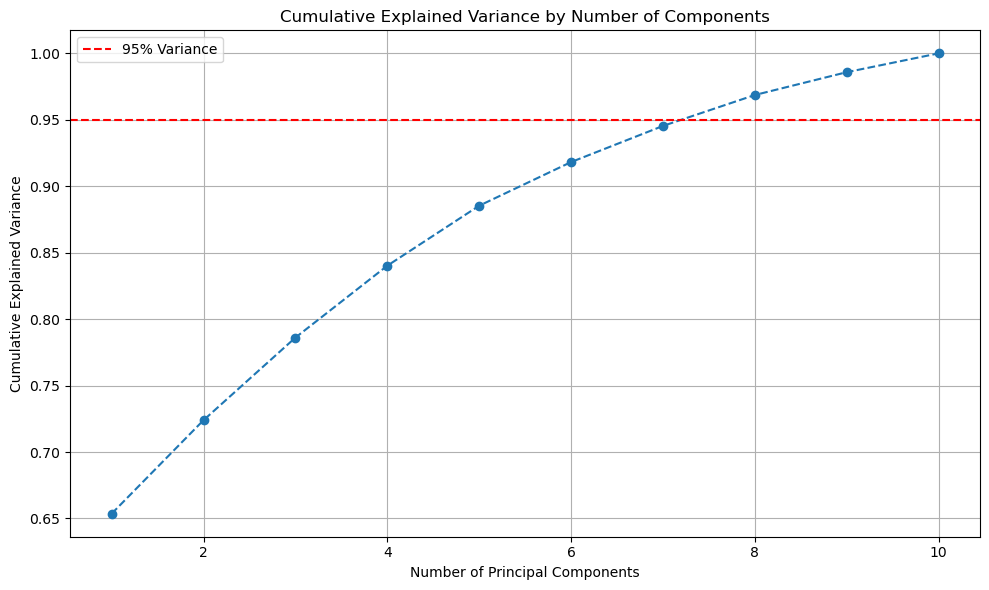

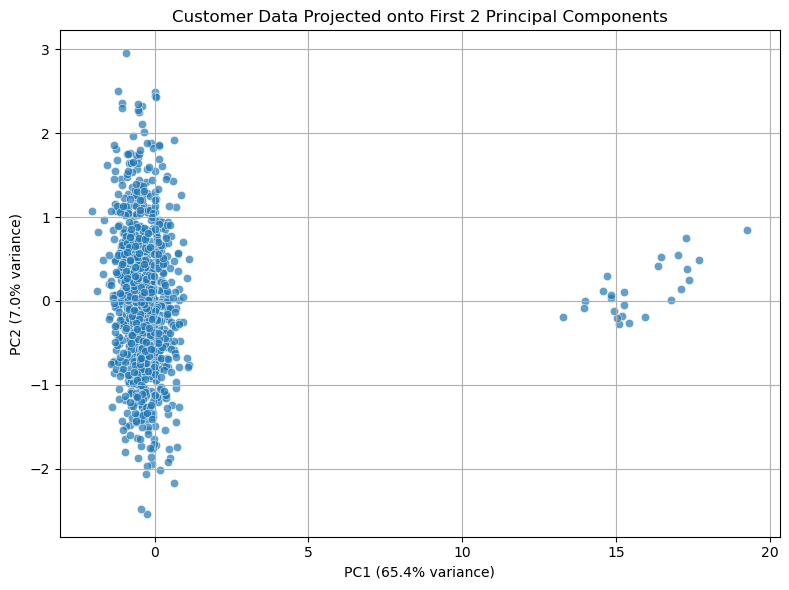

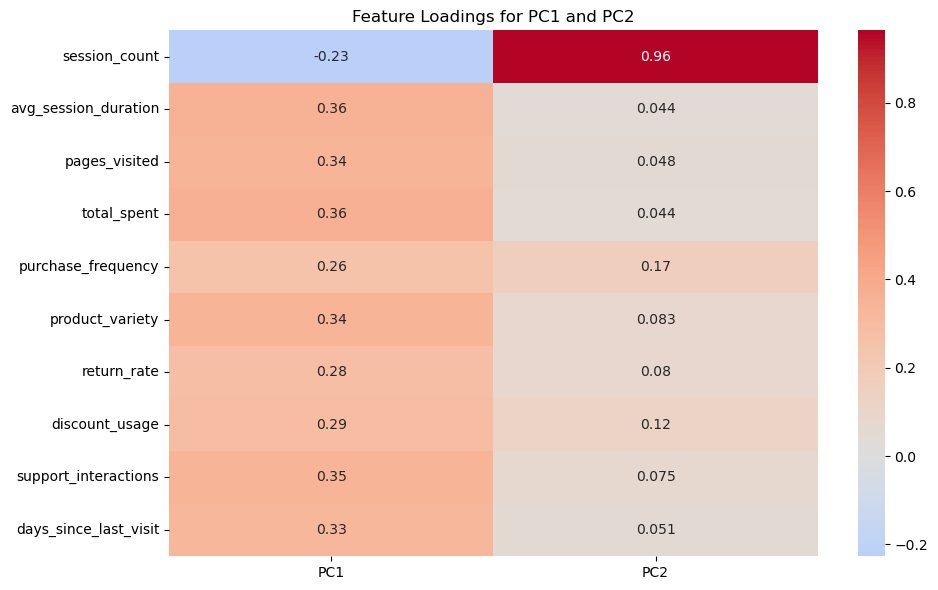

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Step 1: Standardize the data
features = customer_behavior.columns.tolist()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(customer_behavior[features])

# Step 2: Fit PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Step 3: Explained variance
explained_var = pca.explained_variance_ratio_
cumulative_var = np.cumsum(explained_var)

# Scree plot - Cumulative variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_var)+1), cumulative_var, marker='o', linestyle='--')
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Variance')
plt.title("Cumulative Explained Variance by Number of Components")
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Step 4: Reduce to 2 components for visualization
pca_2d = PCA(n_components=2)
X_2d = pca_2d.fit_transform(X_scaled)

pca_df = pd.DataFrame(data=X_2d, columns=['PC1', 'PC2'])

# Step 5: 2D Scatter plot of projected data
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', data=pca_df, alpha=0.7)
plt.title("Customer Data Projected onto First 2 Principal Components")
plt.xlabel(f"PC1 ({explained_var[0]*100:.1f}% variance)")
plt.ylabel(f"PC2 ({explained_var[1]*100:.1f}% variance)")
plt.grid(True)
plt.tight_layout()
plt.show()

# Step 6: Plot feature loadings 
loading_matrix = pca_2d.components_.T
loading_df = pd.DataFrame(loading_matrix, index=features, columns=['PC1', 'PC2'])

plt.figure(figsize=(10, 6))
sns.heatmap(loading_df, annot=True, cmap="coolwarm", center=0)
plt.title("Feature Loadings for PC1 and PC2")
plt.tight_layout()
plt.show()

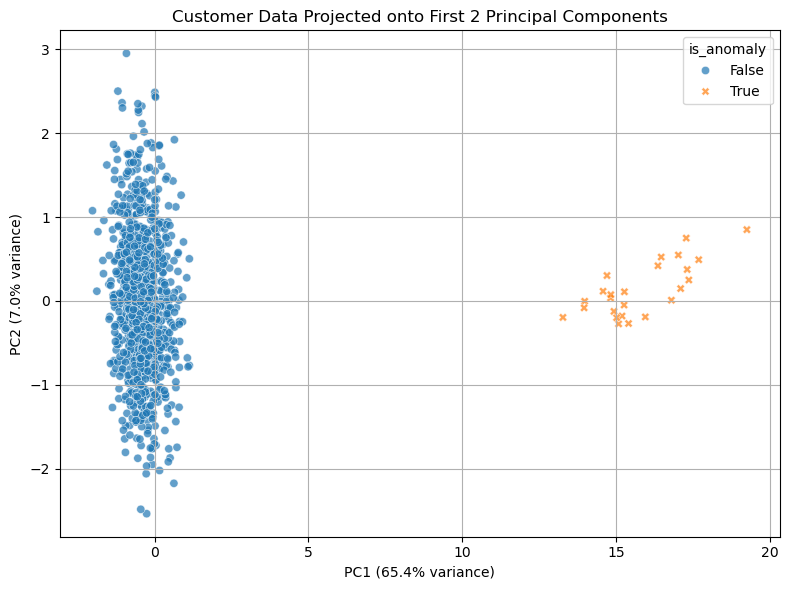

In [3]:
threshold = pca_df["PC1"].mean() + 3 * pca_df["PC1"].std()
pca_df["is_anomaly"] = pca_df["PC1"] > threshold

plt.figure(figsize=(8, 6))
sns.scatterplot(
    x="PC1", y="PC2",
    data=pca_df,
    hue="is_anomaly",
    style="is_anomaly",
    alpha=0.7
)
plt.title("Customer Data Projected onto First 2 Principal Components")
plt.xlabel(f"PC1 ({explained_var[0]*100:.1f}% variance)")
plt.ylabel(f"PC2 ({explained_var[1]*100:.1f}% variance)")
plt.grid(True)
plt.tight_layout()
plt.show()


C:\Users\corne\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


Text(0.5, 1.0, 'Customer Segmentation with K-Means')

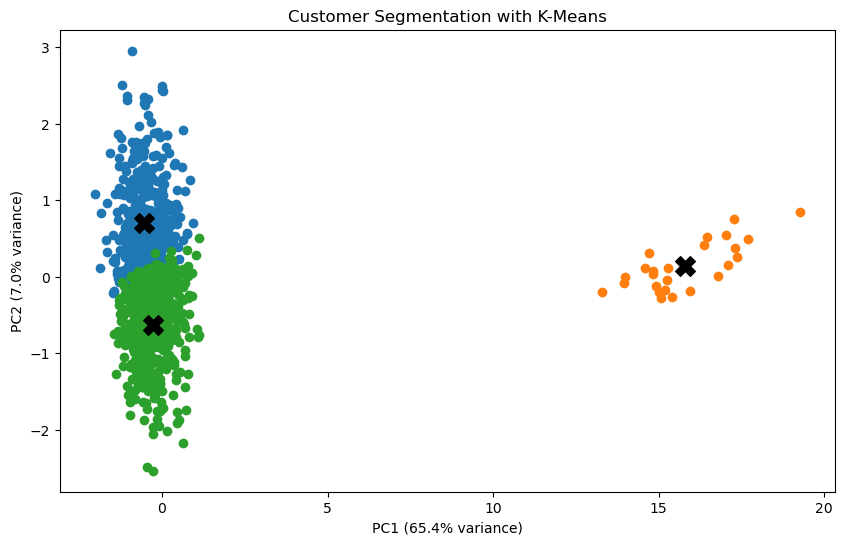

In [4]:
from sklearn.cluster import KMeans

# Step 1: Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(customer_behavior)

# Step 2: Apply K-Means clustering
k = 3  # you can change this or use elbow method
kmeans = KMeans(n_clusters=k, init='k-means++', n_init=10, random_state=42)
kmeans.fit(X_scaled)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Step 3: Apply PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
centroids_pca = pca.transform(centroids)

# Step 4: Visualize the clusters
plt.figure(figsize=(10, 6))
for i in range(k):
    plt.scatter(X_pca[labels == i, 0], X_pca[labels == i, 1], label=f'Cluster {i}')
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], c='black', s=200, marker='X', label='Centroids')
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.1f}% variance)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.1f}% variance)')
plt.title('Customer Segmentation with K-Means')


C:\Users\corne\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
C:\Users\corne\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
C:\Users\corne\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
C:\Users\corne\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

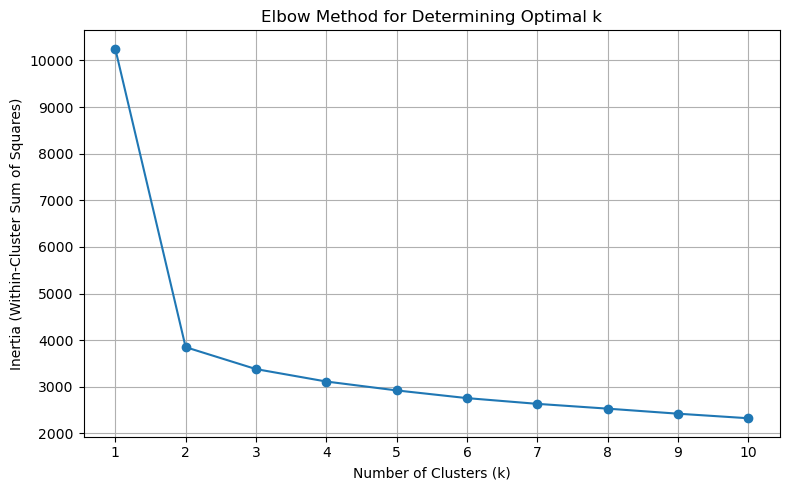

In [5]:
inertia_values = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', n_init=10, random_state=42)
    kmeans.fit(X_scaled)
    inertia_values.append(kmeans.inertia_)

# Step 3: Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia_values, marker='o')
plt.title('Elbow Method for Determining Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Within-Cluster Sum of Squares)')
plt.xticks(k_range)
plt.grid(True)
plt.tight_layout()
plt.show()

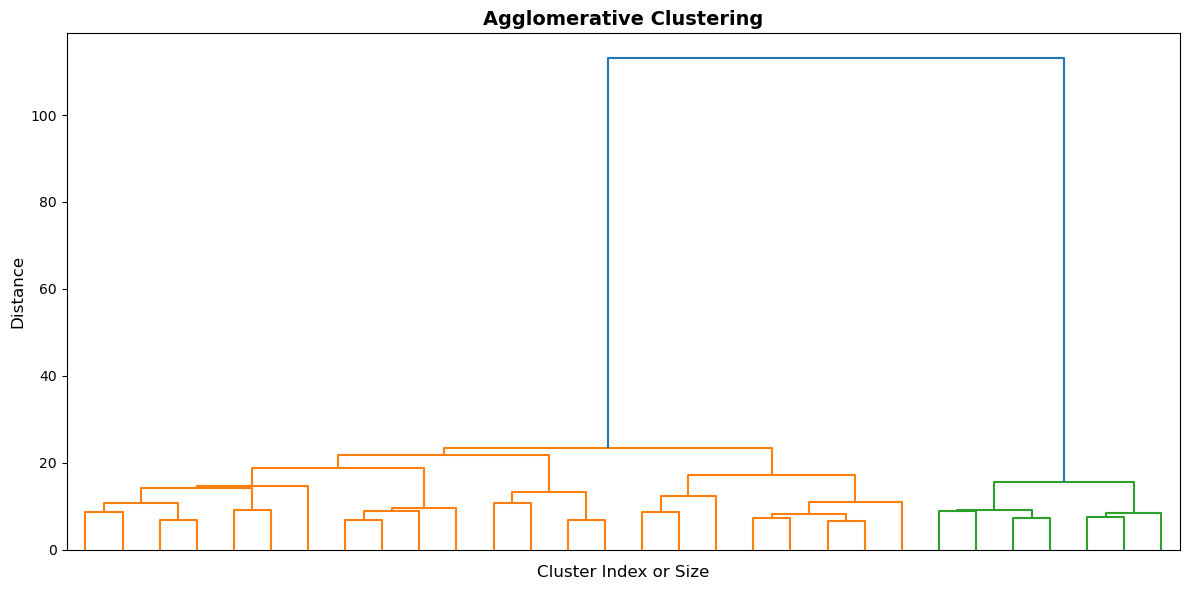

In [6]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(customer_behavior)

# Compute linkage matrix (Ward's method)
linked = linkage(X_scaled, method='ward')

# Plot dendrogram
plt.figure(figsize=(12, 6))
dendrogram(
    linked,
    orientation='top',
    distance_sort='descending',
    show_leaf_counts=False,
    truncate_mode='lastp', 
    p=30,                
    color_threshold=None )

# Styling the plot
plt.title('Agglomerative Clustering', fontsize=14, weight='bold')
plt.xlabel('Cluster Index or Size', fontsize=12)
plt.ylabel('Distance', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.gca().set_facecolor('white')  
plt.gcf().set_facecolor('white')  
plt.grid(False)                   

plt.tight_layout()
plt.show()


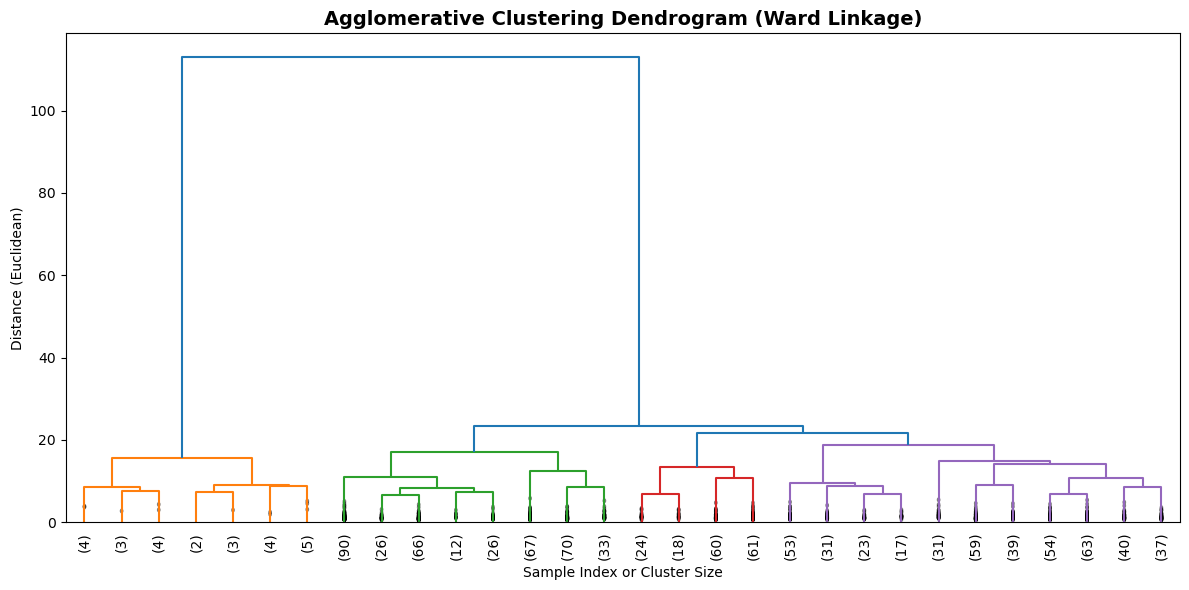

In [7]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

scaler = StandardScaler()
X_scaled = scaler.fit_transform(customer_behavior)

linked = linkage(X_scaled, method='ward')

plt.figure(figsize=(12, 6))
dendrogram(
    linked,
    truncate_mode='lastp',  # Show only the last p merged clusters
    p=30,
    leaf_rotation=90.,
    leaf_font_size=10.,
    show_contracted=True,
    color_threshold=20  # You can adjust this value to highlight cluster splits
)

# Styling
plt.title('Agglomerative Clustering Dendrogram (Ward Linkage)', fontsize=14, weight='bold')
plt.xlabel('Sample Index or Cluster Size')
plt.ylabel('Distance (Euclidean)')
plt.grid(False)
plt.gca().set_facecolor('white')
plt.gcf().set_facecolor('white')
plt.tight_layout()
plt.show()


In [8]:
from scipy.cluster.hierarchy import fcluster

cluster_labels = fcluster(linked, t=3, criterion='maxclust')
customer_behavior['agglomerative_cluster'] = cluster_labels
customer_behavior

,session_count,avg_session_duration,pages_visited,total_spent,purchase_frequency,product_variety,return_rate,discount_usage,support_interactions,days_since_last_visit,agglomerative_cluster
0,23,5.177320,6.812728,169.605402,0,4,0.254682,25.505569,1,71,3
1,15,7.711826,9.651593,43.096426,4,3,0.070044,12.326525,0,51,2
2,21,7.692573,4.425673,69.103336,2,6,0.159048,8.753443,1,39,3
3,25,7.180291,4.205764,193.654437,3,2,0.046724,15.043512,2,28,3
4,15,12.488425,5.832801,156.666087,2,4,0.181730,27.168795,0,26,3
...,...,...,...,...,...,...,...,...,...,...,...
1020,2,67.241758,43.762529,4652.353630,9,24,0.750444,82.850945,13,294,1
1021,2,87.537480,35.842142,3784.391747,8,41,0.651045,96.570480,18,274,1
1022,2,58.326953,32.063522,4211.923165,9,33,0.906352,61.174652,10,367,1
1023,2,89.004955,20.883275,2400.843412,8,30,0.971165,92.065471,12,399,1


C:\Users\corne\AppData\Local\Temp\ipykernel_22852\2025790904.py:23: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', len(unique_labels))


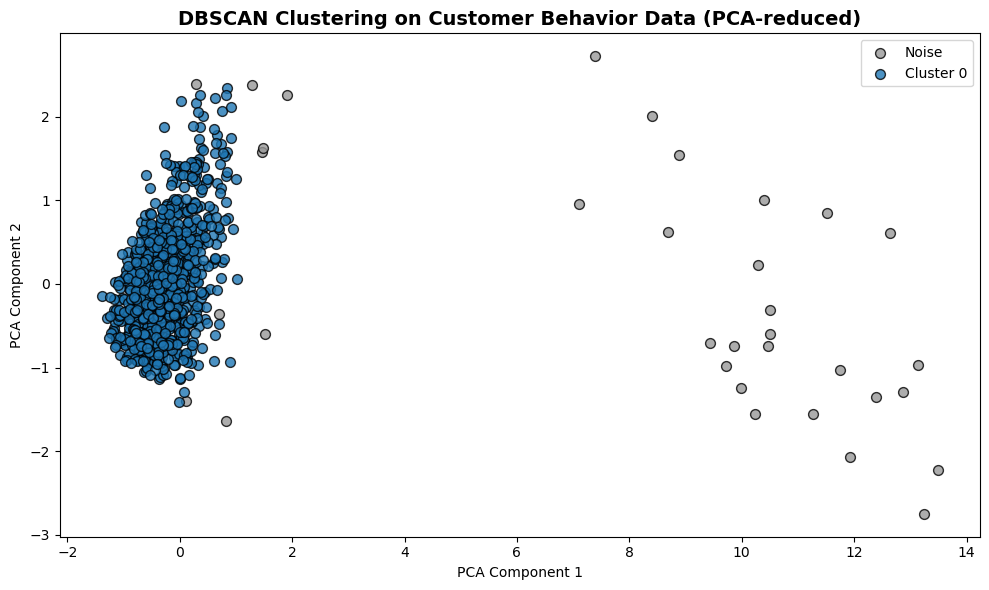

In [9]:
from sklearn.cluster import DBSCAN

#Step 0: Select few set of data
data = customer_behavior[['pages_visited', 'total_spent', 'return_rate', 'support_interactions']].copy()
# Step 1: Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data)

# Step 2: Apply DBSCAN
# You can tune eps and min_samples based on your data
dbscan = DBSCAN(eps=0.5, min_samples=5)
labels = dbscan.fit_predict(X_scaled)

# Step 3: Visualize the clustering results
# For visualization, reduce to 2D using PCA for plotting
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Define colors (distinct + grey for noise)
unique_labels = np.unique(labels)
colors = plt.cm.get_cmap('tab10', len(unique_labels))

plt.figure(figsize=(10, 6))
for label in unique_labels:
    is_noise = label == -1
    plt.scatter(
        X_pca[labels == label, 0],
        X_pca[labels == label, 1],
        s=50,
        c=[colors(label)] if not is_noise else ['#999999'],
        label=f'Cluster {label}' if not is_noise else 'Noise',
        edgecolor='k',
        alpha=0.8
    )

plt.title('DBSCAN Clustering on Customer Behavior Data (PCA-reduced)', fontsize=14, weight='bold')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.grid(False)
plt.gca().set_facecolor('white')
plt.tight_layout()
plt.show()


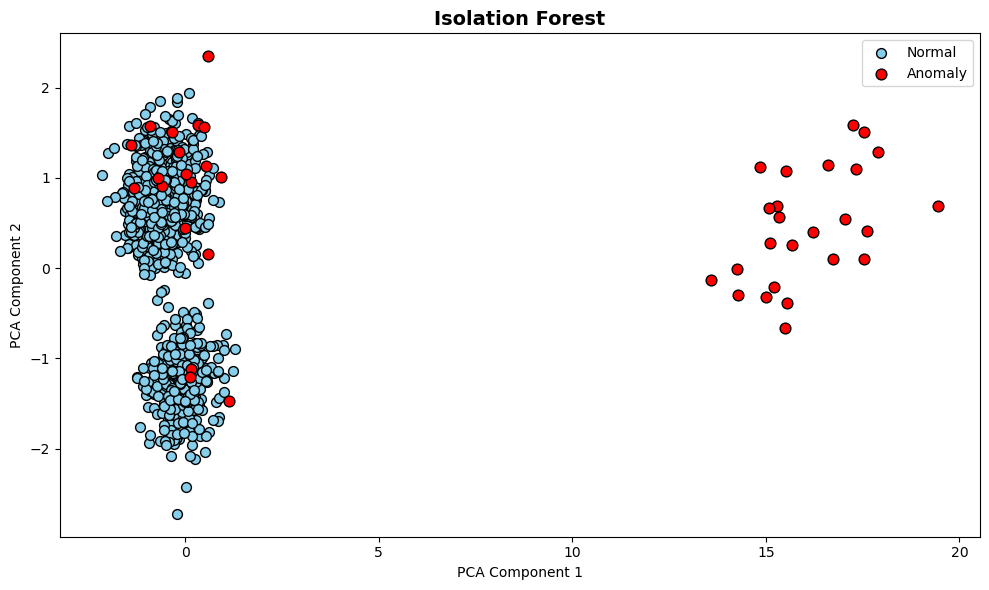

In [10]:
from sklearn.ensemble import IsolationForest
# Scale the data
X_scaled = StandardScaler().fit_transform(customer_behavior)

# Fit Isolation Forest
iso = IsolationForest(contamination='auto', random_state=42)
labels = iso.fit_predict(X_scaled)

# PCA for 2D visualization
X_pca = PCA(n_components=2).fit_transform(X_scaled)

# 2D scatter plot of anomaly results
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[labels == 1, 0], X_pca[labels == 1, 1],
            c='skyblue', edgecolor='k', s=50, label='Normal')
plt.scatter(X_pca[labels == -1, 0], X_pca[labels == -1, 1],
            c='red', edgecolor='k', s=60, label='Anomaly')
plt.title('Isolation Forest', fontsize=14, weight='bold')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.grid(False)
plt.gca().set_facecolor('white')
plt.tight_layout()
plt.show()


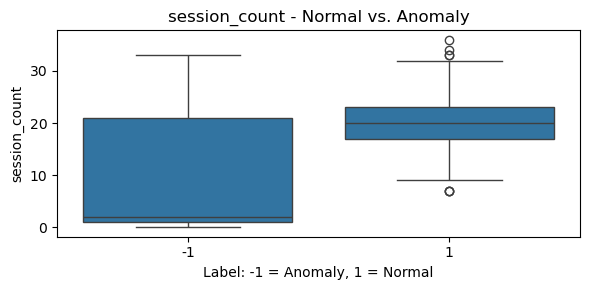

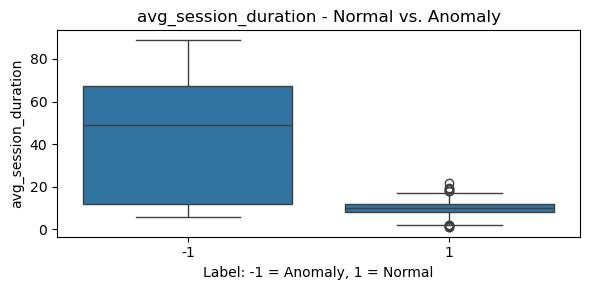

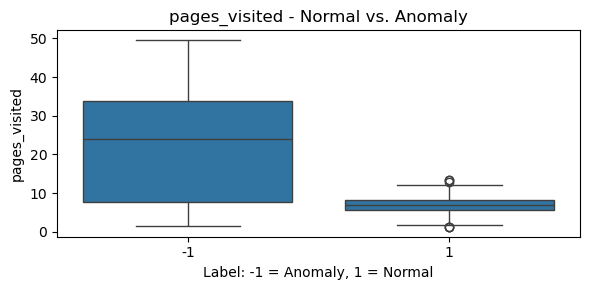

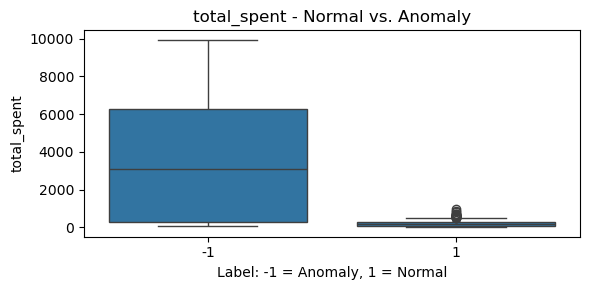

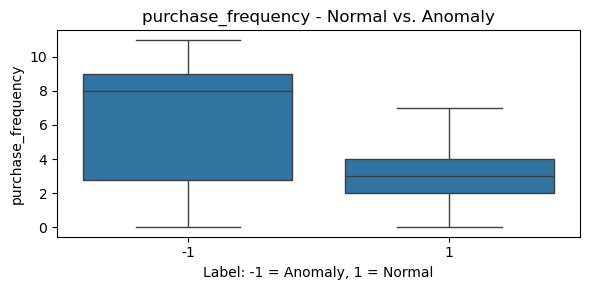

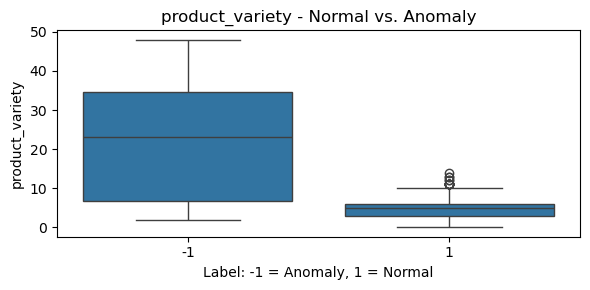

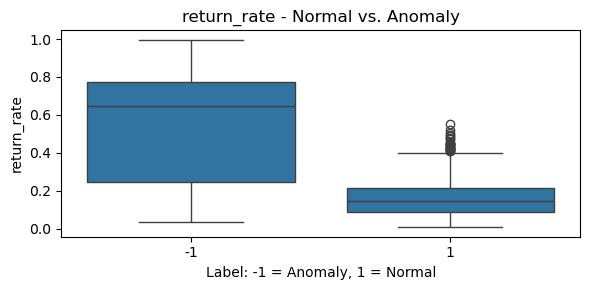

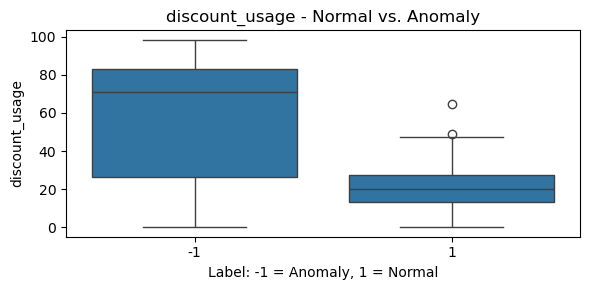

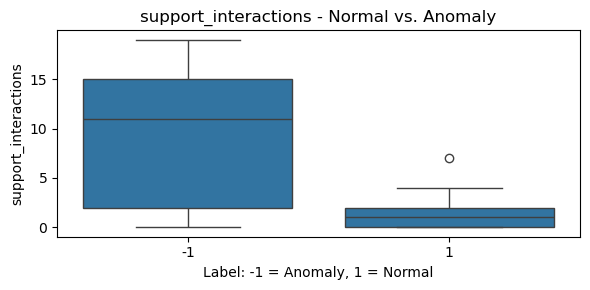

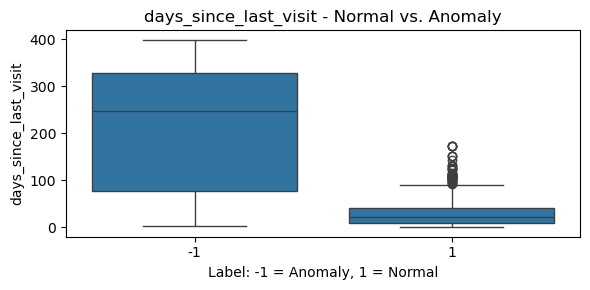

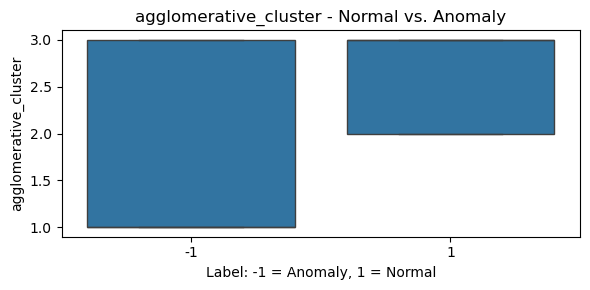

In [11]:

temp_df = customer_behavior.copy()
temp_df['anomaly_label'] = labels

for col in customer_behavior.columns:
    plt.figure(figsize=(6, 3))
    sns.boxplot(data=temp_df, x='anomaly_label', y=col)
    plt.title(f'{col} - Normal vs. Anomaly')
    plt.xlabel('Label: -1 = Anomaly, 1 = Normal')
    plt.tight_layout()
    plt.show()

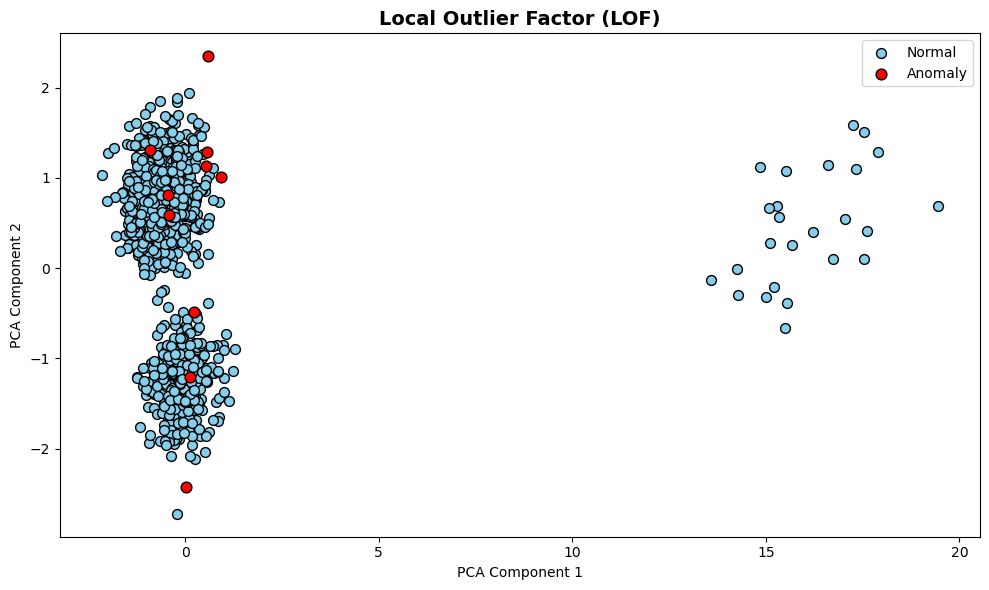

In [12]:
from sklearn.neighbors import LocalOutlierFactor

X_scaled = StandardScaler().fit_transform(customer_behavior)

lof = LocalOutlierFactor(n_neighbors=4, contamination='auto')
labels = lof.fit_predict(X_scaled)

X_pca = PCA(n_components=2).fit_transform(X_scaled)

plt.figure(figsize=(10, 6))
plt.scatter(X_pca[labels == 1, 0], X_pca[labels == 1, 1],
            c='skyblue', edgecolor='k', s=50, label='Normal')
plt.scatter(X_pca[labels == -1, 0], X_pca[labels == -1, 1],
            c='red', edgecolor='k', s=60, label='Anomaly')
plt.title('Local Outlier Factor (LOF)', fontsize=14, weight='bold')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.grid(False)
plt.gca().set_facecolor('white')
plt.tight_layout()
plt.show()


In [13]:
from sklearn.manifold import trustworthiness

X_scaled = StandardScaler().fit_transform(customer_behavior)
X_pca = PCA(n_components=2).fit_transform(X_scaled)

# Evaluate trustworthiness
trust = trustworthiness(X_scaled, X_pca, n_neighbors=5)
print(f"Trustworthiness: {trust:.4f}")

Trustworthiness: 0.8013


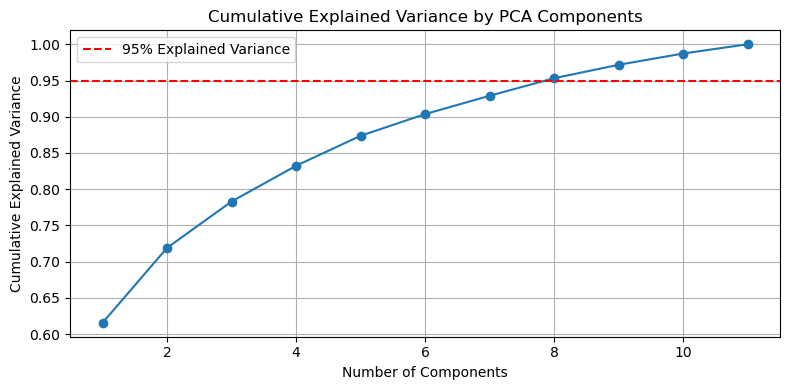

In [14]:
pca = PCA().fit(X_scaled)

# Plot cumulative explained variance
plt.figure(figsize=(8, 4))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1),
         pca.explained_variance_ratio_.cumsum(), marker='o')
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Explained Variance')
plt.title('Cumulative Explained Variance by PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [15]:
from sklearn.metrics import pairwise_distances

X_scaled = StandardScaler().fit_transform(customer_behavior)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

D_original = pairwise_distances(X_scaled, metric='euclidean')
D_pca = pairwise_distances(X_pca, metric='euclidean')

epsilon = 1e-9
D_original = np.where(D_original == 0, epsilon, D_original)

# Compute Sammon’s stress error
numerator = ((D_original - D_pca) ** 2 / D_original).sum()
denominator = D_original.sum()
sammon_stress = numerator / denominator

print(f"Sammon's Stress Score: {sammon_stress:.4f}")


Sammon's Stress Score: 0.2160


In [16]:
from sklearn.metrics import silhouette_score

kmeans = KMeans(n_clusters=3, random_state=42)
cluster_labels = kmeans.fit_predict(X_scaled)

# Silhouette score
silhouette = silhouette_score(X_scaled, cluster_labels)
print(f"Silhouette Coefficient: {silhouette:.4f}")

Silhouette Coefficient: 0.2615


C:\Users\corne\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


In [17]:
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
import numpy as np

# Scale the data
X_scaled = StandardScaler().fit_transform(customer_behavior)

# Fit Isolation Forest and get anomaly scores
iso = IsolationForest(contamination='auto', random_state=42)
iso.fit(X_scaled)

# Note: decision_function returns anomaly scores (the higher, the more normal)
scores = -iso.decision_function(X_scaled)  # Flip sign: higher = more anomalous


In [18]:
from sklearn.metrics import calinski_harabasz_score

# CH index
ch_index = calinski_harabasz_score(X_scaled, cluster_labels)
print(f"Calinski-Harabasz Index: {ch_index:.2f}")

Calinski-Harabasz Index: 1100.52


In [19]:
from sklearn.metrics import davies_bouldin_score

# Davies-Bouldin Index
db_index = davies_bouldin_score(X_scaled, cluster_labels)
print(f"Davies-Bouldin Index: {db_index:.4f}")

Davies-Bouldin Index: 1.1593


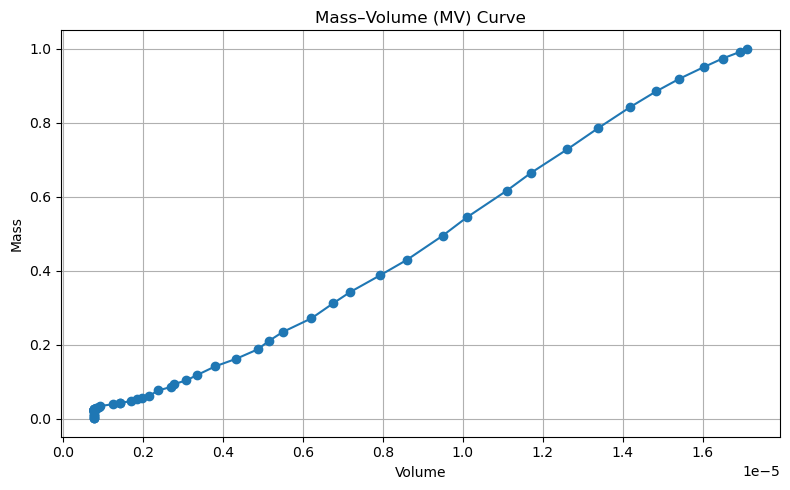

In [20]:
from sklearn.neighbors import KernelDensity
from sklearn.model_selection import GridSearchCV

# Estimate data density using Kernel Density Estimation (KDE)
def estimate_volume(X, scores, thresholds):
    kde = GridSearchCV(KernelDensity(kernel='gaussian'),
                       {'bandwidth': np.linspace(0.1, 1.5, 20)},
                       cv=3).fit(X)
    kde = kde.best_estimator_

    volumes = []
    masses = []

    for t in thresholds:
        mask = scores >= t
        mass = mask.mean()
        if mass == 0:
            continue
        selected_points = X[mask]
        log_density = kde.score_samples(selected_points)
        volume = np.exp(log_density).mean()
        masses.append(mass)
        volumes.append(volume)

    return np.array(masses), np.array(volumes)

thresholds = np.linspace(np.min(scores), np.max(scores), 100)
mass, volume = estimate_volume(X_scaled, scores, thresholds)

plt.figure(figsize=(8, 5))
plt.plot(volume, mass, marker='o')
plt.xlabel('Volume')
plt.ylabel('Mass')
plt.title('Mass–Volume (MV) Curve')
plt.grid(True)
plt.tight_layout()
plt.show()


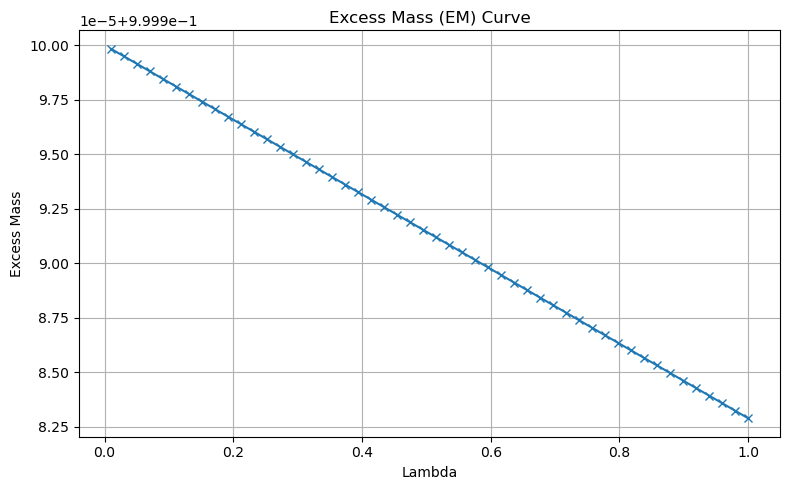

In [21]:
def compute_excess_mass(masses, volumes, lambdas):
    em_values = []
    for lam in lambdas:
        em = np.max(masses - lam * volumes)
        em_values.append(em)
    return np.array(em_values)

# Define a grid of lambda values
lambdas = np.linspace(0.01, 1.0, 50)

# Compute EM curve
em_curve = compute_excess_mass(mass, volume, lambdas)

# Plot
plt.figure(figsize=(8, 5))
plt.plot(lambdas, em_curve, marker='x')
plt.xlabel('Lambda')
plt.ylabel('Excess Mass')
plt.title('Excess Mass (EM) Curve')
plt.grid(True)
plt.tight_layout()
plt.show()


C:\Users\corne\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\corne\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\corne\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


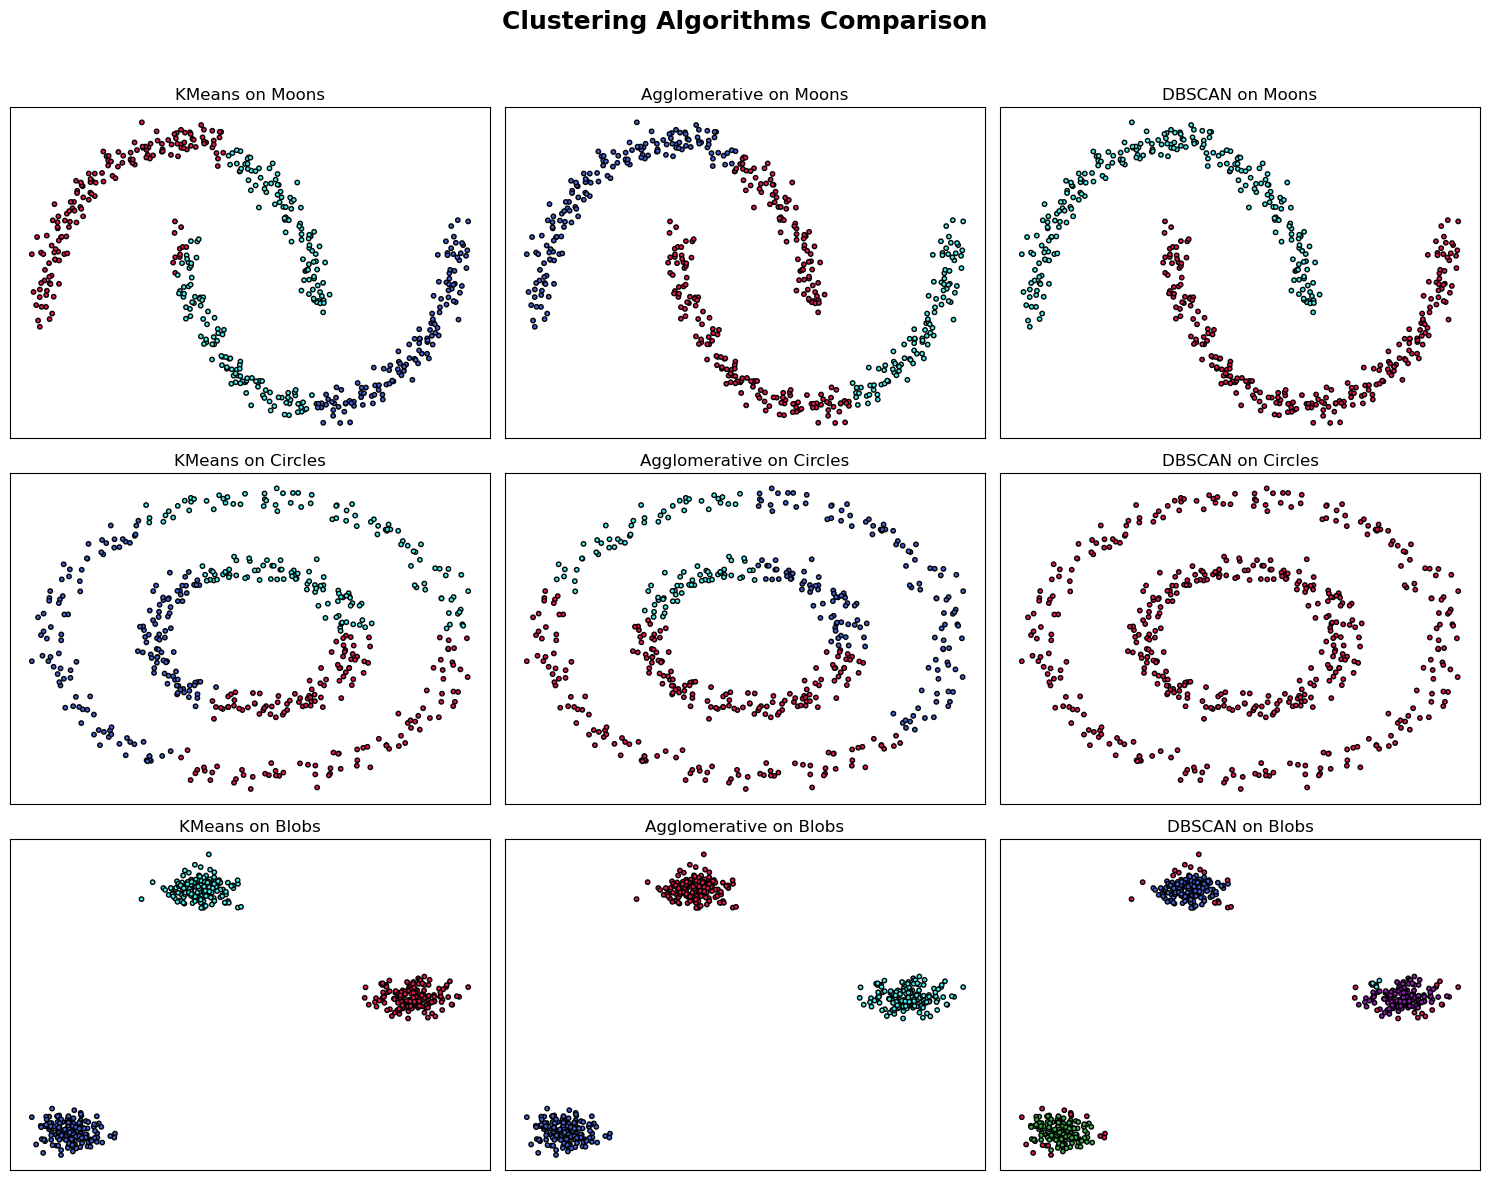

In [22]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.datasets import make_moons, make_circles, make_blobs
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN

# Define custom popping colors
custom_cmap = ListedColormap(["#e6194b", "#3cb44b", "#ffe119", "#4363d8", "#f58231", "#911eb4", "#46f0f0"])

# Prepare datasets
datasets = [
    ("Moons", make_moons(n_samples=500, noise=0.05, random_state=42)),
    ("Circles", make_circles(n_samples=500, factor=0.5, noise=0.05)),
    ("Blobs", make_blobs(n_samples=500, centers=3, cluster_std=0.60, random_state=42))
]

# Prepare clustering algorithms
clustering_algorithms = [
    ("KMeans", KMeans(n_clusters=3, random_state=42)),
    ("Agglomerative", AgglomerativeClustering(n_clusters=3)),
    ("DBSCAN", DBSCAN(eps=0.3, min_samples=5))
]

# Plot configuration
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))
fig.suptitle("Clustering Algorithms Comparison", fontsize=18, weight='bold')

for row_idx, (dataset_name, (X, _)) in enumerate(datasets):
    for col_idx, (algo_name, algo) in enumerate(clustering_algorithms):
        ax = axes[row_idx, col_idx]

        # Fit clustering
        y_pred = algo.fit_predict(X)

        # Plot result
        scatter = ax.scatter(
            X[:, 0], X[:, 1],
            c=y_pred, cmap=custom_cmap, s=10, edgecolor='k'
        )
        ax.set_title(f"{algo_name} on {dataset_name}")
        ax.set_xticks([])
        ax.set_yticks([])

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import trustworthiness

rng = np.random.default_rng(42)

def make_customer_behavior(n=1200, engagement_shift=0.0, value_shift=0.0):
    engagement = rng.normal(loc=0.0 + engagement_shift, scale=1.0, size=n)
    value = rng.normal(loc=0.0 + value_shift, scale=1.0, size=n)

    # Correlated observed features (simple linear constructions + noise)
    sessions_per_week      = 6 + 3.0*engagement + rng.normal(0, 0.8, n)
    active_days_per_week   = 3 + 1.5*engagement + rng.normal(0, 0.5, n)
    avg_session_minutes    = 12 + 2.0*engagement + rng.normal(0, 1.0, n)
    features_used          = 2 + 1.8*engagement + 0.6*value + rng.normal(0, 0.7, n)
    monthly_spend_usd      = 50 + 25.0*value + 5.0*engagement + rng.normal(0, 8.0, n)
    support_tickets_month  = np.clip(2.0 - 0.8*engagement + rng.normal(0, 0.6, n), 0, None)

    df = pd.DataFrame({
        "sessions_per_week": sessions_per_week,
        "active_days_per_week": active_days_per_week,
        "avg_session_minutes": avg_session_minutes,
        "features_used": features_used,
        "monthly_spend_usd": monthly_spend_usd,
        "support_tickets_month": support_tickets_month
    })
    return df

# Time window A (baseline)
df_A = make_customer_behavior(n=1200, engagement_shift=0.0, value_shift=0.0)

# Time window B (drift: engagement increases)
df_B = make_customer_behavior(n=1200, engagement_shift=0.8, value_shift=0.0)

# Standardize + fit PCA on A
scaler = StandardScaler()
X_A = scaler.fit_transform(df_A)
X_B = scaler.transform(df_B)

pca = PCA(n_components=2, random_state=42)
Z_A = pca.fit_transform(X_A)
Z_B = pca.transform(X_B)

print("Explained variance ratio:", pca.explained_variance_ratio_)
print("Trustworthiness (k=10) on A:", trustworthiness(X_A, Z_A, n_neighbors=10))

Explained variance ratio: [0.71479666 0.16600064]
Trustworthiness (k=10) on A: 0.9496795412973125


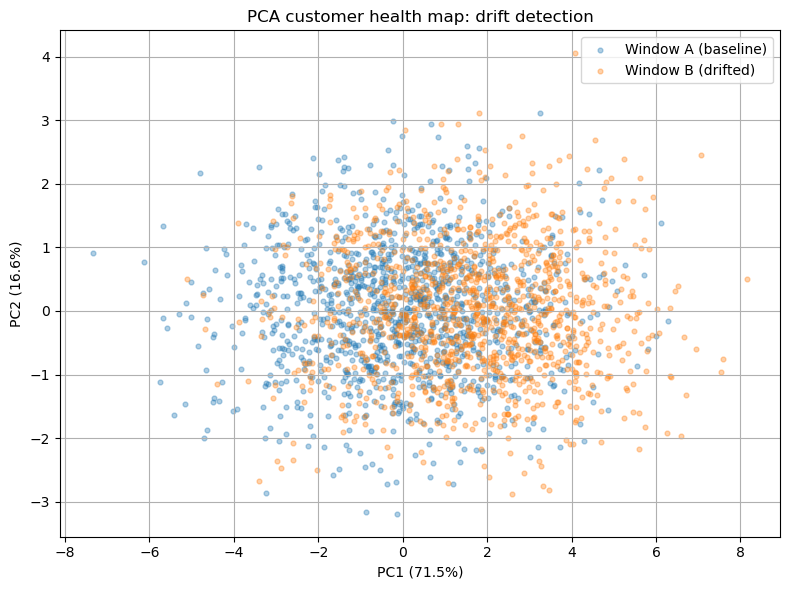

In [24]:
# Plot: health map + drift
plt.figure(figsize=(8, 6))
plt.scatter(Z_A[:, 0], Z_A[:, 1], s=12, alpha=0.35, label="Window A (baseline)")
plt.scatter(Z_B[:, 0], Z_B[:, 1], s=12, alpha=0.35, label="Window B (drifted)")
plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.1f}%)")
plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.1f}%)")
plt.title("PCA customer health map: drift detection")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [25]:
loadings = pd.Series(pca.components_[0], index=df_A.columns).sort_values(key=np.abs, ascending=False)
print("\nTop contributors to PC1:")
print(loadings)


Top contributors to PC1:
sessions_per_week        0.459891
active_days_per_week     0.454849
features_used            0.450136
avg_session_minutes      0.438392
support_tickets_month   -0.405651
monthly_spend_usd        0.149164
dtype: float64


In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.decomposition import PCA

rng = np.random.default_rng(7)

def make_segments():
    n1, n2, n3 = 450, 350, 200

    # Segment 1: Casual users (low activity, low spend)
    s1 = pd.DataFrame({
        "sessions_per_week": rng.normal(2.0, 0.8, n1),
        "avg_session_minutes": rng.normal(6.0, 1.5, n1),
        "features_used": rng.normal(2.0, 0.7, n1),
        "monthly_spend_usd": rng.normal(15.0, 8.0, n1)
    })

    # Segment 2: Power users (high activity, moderate spend)
    s2 = pd.DataFrame({
        "sessions_per_week": rng.normal(9.0, 1.5, n2),
        "avg_session_minutes": rng.normal(14.0, 2.5, n2),
        "features_used": rng.normal(6.0, 1.0, n2),
        "monthly_spend_usd": rng.normal(45.0, 12.0, n2)
    })

    # Segment 3: High-value / enterprise-like (moderate activity, high spend)
    s3 = pd.DataFrame({
        "sessions_per_week": rng.normal(5.0, 1.2, n3),
        "avg_session_minutes": rng.normal(11.0, 2.0, n3),
        "features_used": rng.normal(5.0, 0.9, n3),
        "monthly_spend_usd": rng.normal(140.0, 25.0, n3)
    })

    df = pd.concat([s1, s2, s3], ignore_index=True)
    # Clip to avoid negatives from sampling
    for c in df.columns:
        df[c] = np.clip(df[c], 0, None)

    # Ground-truth label only for validation (not used by K-Means)
    df["true_segment"] = (["casual"]*n1) + (["power"]*n2) + (["high_value"]*n3)
    return df

df = make_segments()

X = df.drop(columns=["true_segment"]).values
X_scaled = StandardScaler().fit_transform(X)

In [27]:
kmeans = KMeans(n_clusters=3, n_init=20, random_state=42)
labels = kmeans.fit_predict(X_scaled)
df["cluster"] = labels

print("Silhouette:", silhouette_score(X_scaled, labels))
print("Calinski-Harabasz:", calinski_harabasz_score(X_scaled, labels))
print("Davies-Bouldin:", davies_bouldin_score(X_scaled, labels))


C:\Users\corne\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


Silhouette: 0.6540319161592172
Calinski-Harabasz: 2819.633571951267
Davies-Bouldin: 0.5994155751499868


In [33]:
profile = df.groupby("cluster")[["sessions_per_week","avg_session_minutes","features_used","monthly_spend_usd"]].mean()
sizes = df["cluster"].value_counts().sort_index()
print("Cluster sizes:")
print(sizes)
print("Cluster profile (means):")
print(profile.round(2))

Cluster sizes:
cluster
0    450
1    200
2    350
Name: count, dtype: int64
Cluster profile (means):
         sessions_per_week  avg_session_minutes  features_used  \
cluster                                                          
0                     1.92                 5.86           2.01   
1                     5.02                10.91           4.96   
2                     9.11                13.94           5.99   

         monthly_spend_usd  
cluster                     
0                    14.76  
1                   141.13  
2                    45.64  


In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.decomposition import PCA

rng = np.random.default_rng(123)

def make_anomaly_data():
    n_regular, n_heavy = 700, 250
    n_bots, n_compromised = 30, 25

    # Regular users
    regular = pd.DataFrame({
        "events_per_min": rng.normal(12, 4, n_regular),
        "avg_session_min": rng.normal(8, 2, n_regular),
        "unique_ips_7d": rng.normal(2, 1, n_regular),
        "monthly_spend_usd": rng.normal(25, 10, n_regular),
        "refund_rate": rng.normal(0.03, 0.02, n_regular)
    })

    # Heavy legitimate users
    heavy = pd.DataFrame({
        "events_per_min": rng.normal(30, 6, n_heavy),
        "avg_session_min": rng.normal(18, 4, n_heavy),
        "unique_ips_7d": rng.normal(3, 1, n_heavy),
        "monthly_spend_usd": rng.normal(80, 25, n_heavy),
        "refund_rate": rng.normal(0.04, 0.02, n_heavy)
    })

    # Bot-like fraud (global anomalies): very high event rate, many IPs, short sessions
    bots = pd.DataFrame({
        "events_per_min": rng.normal(120, 20, n_bots),
        "avg_session_min": rng.normal(2.5, 1.0, n_bots),
        "unique_ips_7d": rng.normal(18, 4, n_bots),
        "monthly_spend_usd": rng.normal(10, 8, n_bots),
        "refund_rate": rng.normal(0.10, 0.05, n_bots)
    })

    # Compromised accounts (local anomalies): look heavy, but abnormal refunds
    compromised = pd.DataFrame({
        "events_per_min": rng.normal(32, 6, n_compromised),
        "avg_session_min": rng.normal(17, 4, n_compromised),
        "unique_ips_7d": rng.normal(3, 1, n_compromised),
        "monthly_spend_usd": rng.normal(85, 25, n_compromised),
        "refund_rate": rng.normal(0.35, 0.08, n_compromised)  # locally unusual
    })

    df = pd.concat([regular, heavy, bots, compromised], ignore_index=True)
    df = df.clip(lower=0)  # keep non-negative
    df["true_type"] = (
        ["regular"]*n_regular +
        ["heavy"]*n_heavy +
        ["bot"]*n_bots +
        ["compromised"]*n_compromised
    )
    return df

df = make_anomaly_data()

X = df.drop(columns=["true_type"]).values
X_scaled = StandardScaler().fit_transform(X)


In [39]:

# Isolation Forest (good for global anomalies)
iso = IsolationForest(n_estimators=300, contamination=0.05, random_state=42)
iso_labels = iso.fit_predict(X_scaled)  # -1 anomaly, +1 normal
iso_score = -iso.decision_function(X_scaled)  # higher = more anomalous
df["iso_label"] = iso_labels
df["iso_score"] = iso_score

# LOF (good for local density anomalies)
lof = LocalOutlierFactor(n_neighbors=25, contamination=0.05)
lof_labels = lof.fit_predict(X_scaled)  # -1 anomaly, +1 normal
lof_score = -lof.negative_outlier_factor_  # higher = more anomalous
df["lof_label"] = lof_labels
df["lof_score"] = lof_score

print("Top anomalies by Isolation Forest:")
print(df.sort_values("iso_score", ascending=False)[["true_type","iso_score"]].head(5))

print("\nTop anomalies by LOF:")
print(df.sort_values("lof_score", ascending=False)[["true_type","lof_score"]].head(5))


Top anomalies by Isolation Forest:
    true_type  iso_score
961       bot   0.112126
952       bot   0.108735
950       bot   0.104609
955       bot   0.103107
967       bot   0.102473

Top anomalies by LOF:
       true_type  lof_score
985  compromised   2.594445
964          bot   2.535285
732        heavy   1.955031
756        heavy   1.863852
104      regular   1.711609


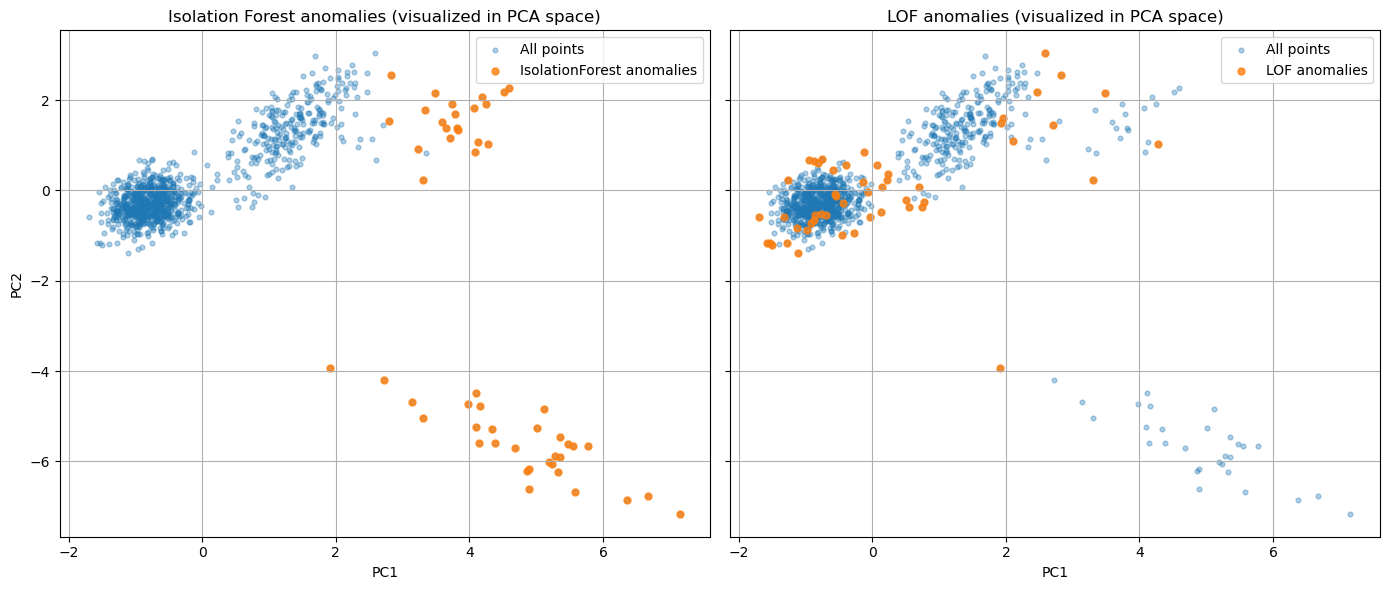

In [38]:
# Visualize in 2D (PCA for plotting only)
Z = PCA(n_components=2, random_state=42).fit_transform(X_scaled)

fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharex=True, sharey=True)

# Left: Isolation Forest
axes[0].scatter(Z[:, 0], Z[:, 1], s=12, alpha=0.35, label="All points")
axes[0].scatter(Z[df["iso_label"] == -1, 0], Z[df["iso_label"] == -1, 1],
                s=25, alpha=0.8, label="IsolationForest anomalies")
axes[0].set_title("Isolation Forest anomalies (visualized in PCA space)")
axes[0].set_xlabel("PC1")
axes[0].set_ylabel("PC2")
axes[0].grid(True)
axes[0].legend()

# Right: LOF
axes[1].scatter(Z[:, 0], Z[:, 1], s=12, alpha=0.35, label="All points")
axes[1].scatter(Z[df["lof_label"] == -1, 0], Z[df["lof_label"] == -1, 1],
                s=25, alpha=0.8, label="LOF anomalies")
axes[1].set_title("LOF anomalies (visualized in PCA space)")
axes[1].set_xlabel("PC1")
axes[1].grid(True)
axes[1].legend()

plt.tight_layout()
plt.show()


In [37]:
# Practical “why” table for investigation
investigation_cols = ["events_per_min","avg_session_min","unique_ips_7d","monthly_spend_usd","refund_rate"]
print("\nExample investigation table (top 8 LOF anomalies):")
print(df.sort_values("lof_score", ascending=False)[["true_type","lof_score"] + investigation_cols].head(8).round(3))


Example investigation table (top 8 LOF anomalies):
        true_type  lof_score  events_per_min  avg_session_min  unique_ips_7d  \
985   compromised      2.594          27.706           17.537          3.820   
964           bot      2.535          75.654            1.632         12.314   
732         heavy      1.955          34.828            3.735          3.326   
756         heavy      1.864          33.348            8.522          2.478   
104       regular      1.712          10.875            4.510          1.778   
417       regular      1.562          15.811           11.634          0.000   
686       regular      1.551          17.004            3.134          1.358   
1003  compromised      1.536          34.228           19.439          3.913   

      monthly_spend_usd  refund_rate  
985              93.620        0.202  
964              14.381        0.013  
732              80.103        0.034  
756              49.575        0.069  
104              51.937        0